# 1. import libraries

In [1]:
# data manipulation and plotting tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# data processing
from category_encoders.one_hot import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler,LabelEncoder

# algorithms
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# model selection tools
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# explainability
import shap

#visual
import seaborn as sns

#MostrarMas
pd.set_option('display.max_columns', None)

In [2]:
#pip install --upgrade category_encoders

In [3]:
pip install --upgrade category_encoders

# 2. Load the dataset

In [4]:
data = pd.read_csv('churn.csv')

In [5]:
data.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Latitude,Longitude,Population,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,34.023810,-118.156582,68701,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,34.044271,-118.185237,55668,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,Los Angeles,90065,34.108833,-118.229715,47534,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,52,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,Inglewood,90303,33.936291,-118.332639,27778,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,12,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,Whittier,90602,33.972119,-118.020188,26265,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,14,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

# 3. Data Splitting

In [7]:
#X = data.drop("Churn Label", axis=1) 
#y = data["Churn Label"]

##Decidimos que es mejor despues

In [8]:
#X_trainin, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Exploratory Data Analysis

In [9]:
# Your code here. Exploratory data analysis can be done before splitting, but do not transform the dataset before splitting.
data.info() #No valores nulos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Under 30                           7043 non-null   object 
 4   Senior Citizen                     7043 non-null   object 
 5   Married                            7043 non-null   object 
 6   Dependents                         7043 non-null   object 
 7   Number of Dependents               7043 non-null   int64  
 8   Country                            7043 non-null   object 
 9   State                              7043 non-null   object 
 10  City                               7043 non-null   object 
 11  Zip Code                           7043 non-null   int64

In [10]:
missing_percentage_Offer = (data['Offer'].isnull().sum() / len(data)) * 100
print(f"Porcentaje de valores faltantes en la columna 'Offer': {missing_percentage_Offer:.2f}%")

Porcentaje de valores faltantes en la columna 'Offer': 55.05%


In [11]:
missing_percentage_Internet_Type = (data['Internet Type'].isnull().sum() / len(data)) * 100
print(f"Porcentaje de valores faltantes en la columna 'Internet Type': {missing_percentage_Internet_Type:.2f}%")

Porcentaje de valores faltantes en la columna 'Internet Type': 21.67%


In [12]:
#Estructura de los datos y resumen:  El dataset original tiene 50 columnas,
#con variables de datos demográficos, geográficas, con información sobre los servicios,
#datos financieros, y satisfacción y comportamiento del cliente.
#Análisis de datos faltantes: Las siguientes columnas tienen valores faltantes:  Offer (55,05%)  e Internet Type (21,67%) 
#Esta información está relacionada con los clientes que se han dado de baja, y se van a ir evaluando a medida que 
#se realice el estudio del dataset

C:\Users\micha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


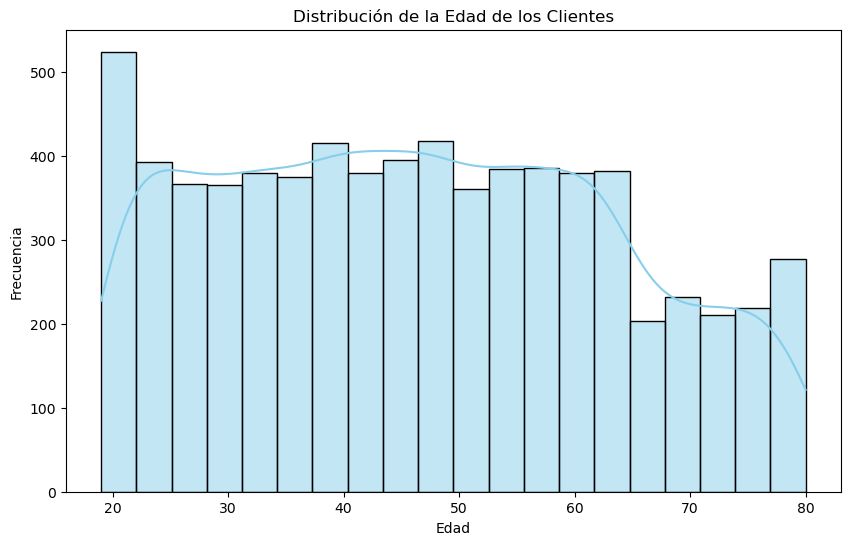

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [14]:
mean_age = data['Age'].mean()
print(f"La media de la edad es: {mean_age}")

La media de la edad es: 46.50972596904728


In [15]:
data['Age'].describe()

count    7043.000000
mean       46.509726
std        16.750352
min        19.000000
25%        32.000000
50%        46.000000
75%        60.000000
max        80.000000
Name: Age, dtype: float64

In [16]:
data["Age_cuartiles"] = pd.qcut(data['Age'], q=4)
print(Age_cuartiles)

NameError: name 'Age_cuartiles' is not defined

In [ ]:
# Agrupar por los cuartiles de edad y contar los valores normalizados (proporciones) de "Churn Label"
proporciones = data.groupby("Age_cuartiles")["Churn Label"].value_counts(normalize=True)

# Mostrar el resultado
print(proporciones)

In [ ]:
#Si agrupamos en cuartiles por edad, los que más hacen churn son los de 60 a 80 años.

In [ ]:
#Los rangos de edad están desde los 19 a 80 años, siendo la media alrededor de los 46.50 años

In [ ]:
data['Tenure in Months'].describe()

In [ ]:
data["Multiple Lines"].value_counts(normalize=True)

In [ ]:
#con select dtypes, excluyendo los números, escojo solo las categóricas
categorical_columns = data.select_dtypes(exclude=["number"]).columns

In [ ]:
categorical_columns

In [ ]:
data.groupby("Internet Service")["Churn Label"].value_counts()

In [ ]:
data.groupby("Internet Service")["Churn Label"].value_counts(normalize=True)

In [ ]:
#De los que NO tienen internet, hay una mayor proporción de NO hacer churn.  

In [ ]:
from scipy.stats import chi2_contingency

# Crear tabla de contingencia entre 'Internet Service' y 'Churn Label'
tabla_contingencia = pd.crosstab(data['Internet Service'], data['Churn Label'])

# Aplicar la prueba Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print(f"Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

In [ ]:
import numpy as np

# Calcular el índice de Cramér
n = data.shape[0]  # número de observaciones
cramer_v = np.sqrt(chi2 / (n * (min(tabla_contingencia.shape) - 1)))

print(f"Índice de Cramér: {cramer_v}")


In [ ]:
#Hay una correlación débil entre tener servicio de internet y hacer churn

In [ ]:
data.groupby("Multiple Lines")["Churn Label"].value_counts()

In [ ]:
data.groupby("Multiple Lines")["Churn Label"].value_counts(normalize=True)

In [ ]:
#hay más clientes que hacen churn cuando tienen múltiples líneas, sin embargo la diferencia no es muy drástica

In [ ]:
# Crear tabla de contingencia
tabla_contingencia_multiple_lines = pd.crosstab(data['Multiple Lines'], data['Churn Label'])

# Aplicar la prueba Chi-cuadrado
chi2_multiple_lines, p_multiple_lines, dof_multiple_lines, expected_multiple_lines = chi2_contingency(tabla_contingencia_multiple_lines)

# Calcular el índice de Cramér
n_multiple_lines = data.shape[0]  # número de observaciones
cramer_v_multiple_lines = np.sqrt(chi2_multiple_lines / (n_multiple_lines * (min(tabla_contingencia_multiple_lines.shape) - 1)))

# Mostrar resultados
print(f"Chi-cuadrado: {chi2_multiple_lines}")
print(f"Valor p: {p_multiple_lines}")
print(f"Índice de Cramér: {cramer_v_multiple_lines}")


In [ ]:
data["Satisfaction Score"].value_counts()

In [ ]:
data.groupby("Satisfaction Score")["Churn Label"].value_counts()

In [ ]:
data.groupby("Satisfaction Score")["Churn Label"].value_counts(normalize=True)

In [ ]:
#Clientes que tienen menos de 3 en score, van a hacer churn. Los que tienen más de 3 no harán churn. 
#Si tienen = 3, hay menor probabilidad de que hagan churn.

## FEATURE ENGINEERING

In [ ]:
# Crear una nueva columna categórica para los niveles de satisfacción
data['Satisfaction_Level'] = pd.cut(data['Satisfaction Score'], 
                                    bins=[0, 2, 3, 5],  # Límites de los grupos
                                    labels=['Baja', 'Media', 'Alta'])  # Nombres de los grupos

# Ver el resultado agrupado
print(data.groupby('Satisfaction_Level')["Churn Label"].value_counts(normalize=True))

In [ ]:
#Los valores del 1 al 2 serán categorizados como "Bajo", el 3 como "Medio" y del 4 al 5 como "Alto".

In [ ]:
# Crear una tabla de contingencia entre los niveles de satisfacción y el churn
tabla_contingencia_satisfaction = pd.crosstab(data['Satisfaction_Level'], data['Churn Label'])

# Aplicar la prueba Chi-cuadrado
chi2_satisfaction, p_satisfaction, dof_satisfaction, expected_satisfaction = chi2_contingency(tabla_contingencia_satisfaction)

# Calcular el índice de Cramér
n_satisfaction = data.shape[0]  # número de observaciones
cramer_v_satisfaction = np.sqrt(chi2_satisfaction / (n_satisfaction * (min(tabla_contingencia_satisfaction.shape) - 1)))

# Mostrar resultados
print(f"Chi-cuadrado: {chi2_satisfaction}")
print(f"Valor p: {p_satisfaction}")
print(f"Índice de Cramér: {cramer_v_satisfaction}")


In [ ]:
data.groupby("Referred a Friend")["Churn Label"].value_counts(normalize=True)

In [ ]:
data.groupby(["Satisfaction_Level","Referred a Friend"])["Churn Label"].value_counts(normalize=True)

In [ ]:
#Bajo nivel de satisfacción, siempre habrá churn sin importar referencias.
#Medio nivel de satisfacción, hay mayor proporción de churn si no ha hecho referencias.
#Alto nivel nunca tiene churn

In [ ]:
# Crear una tabla de contingencia entre "Referred a Friend" y "Churn Label"
tabla_contingencia_referred = pd.crosstab(data['Referred a Friend'], data['Churn Label'])

# Aplicar la prueba Chi-cuadrado
chi2_referred, p_referred, dof_referred, expected_referred = chi2_contingency(tabla_contingencia_referred)

# Calcular el índice de Cramér
n_referred = data.shape[0]  # número de observaciones
cramer_v_referred = np.sqrt(chi2_referred / (n_referred * (min(tabla_contingencia_referred.shape) - 1)))

# Mostrar resultados
print(f"Chi-cuadrado: {chi2_referred}")
print(f"Valor p: {p_referred}")
print(f"Índice de Cramér: {cramer_v_referred}")


In [ ]:
data["Churn Label"].value_counts(normalize="True")

In [ ]:
data["Payment Method"].value_counts(normalize=True) ##Mas de la mitad son por Bank

In [ ]:
data.groupby("Payment Method")["Churn Label"].value_counts(normalize=True)

In [ ]:
# Crear el DataFrame a partir de tus datos
data_frame = {'Payment Method': ['Bank Withdrawal', 'Bank Withdrawal', 'Credit Card', 'Credit Card', 'Mailed Check', 'Mailed Check'],
        'Churn Label': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
        'Proportion': [0.660015, 0.339985, 0.855220, 0.144780, 0.631169, 0.368831]}

df = pd.DataFrame(data_frame)

# Pivotar la tabla para que Churn Label sea la columna
pivot_df = df.pivot(index='Payment Method', columns='Churn Label', values='Proportion')

# Graficar barras apiladas
pivot_df.plot(kind='bar', stacked=True)

plt.title('Proporción de Churn por Método de Pago')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Los que menos hacen churn son los que pagan con tarjeta de crédito. 

In [ ]:
data["City"].value_counts()

In [ ]:
data["City"].describe()

In [ ]:
data.groupby("Age")["Churn Label"].value_counts()

In [ ]:
data.groupby("City")["Churn Label"].value_counts(normalize=True)

In [ ]:
data.groupby("City")["Churn Label"].value_counts()

In [ ]:
data["City"].value_counts()

In [ ]:
data["City"].describe()

In [ ]:
#corr calcula coeficiente de correlacion de pearson, y solo toma las numericas
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f")

In [ ]:
data[(data["Total Refunds"]!=0) & (data["Churn Label"]=="Yes")] ## Ver cuan relacionado esta que haya reembolsos con el churn

In [ ]:
value_counts = data["Total Extra Data Charges"].value_counts()

# Convierte el resultado de value_counts a un DataFrame para facilitar la visualización
df = value_counts.reset_index()
df.columns = ['Total Extra Data Charges', 'Count']
df

In [ ]:
plt.figure(figsize=(15, 6))  # Ajusta el valor 15 para hacerla aún más ancha si lo necesitas
plt.bar(df['Total Extra Data Charges'], df['Count'], color='skyblue')
plt.xlabel('Total Extra Data Charges')
plt.ylabel('Count')
plt.title('Distribution of Total Extra Data Charges')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
sns.histplot(data["Total Extra Data Charges"], bins=140)
plt.show()

In [ ]:
sns.histplot(data['Total Charges'])
plt.show()

In [ ]:
sns.histplot(data['Total Revenue'])
plt.show()

In [ ]:
data["Referred a Friend"].value_counts()

In [ ]:
sns.histplot(data['Satisfaction Score'],bins = 5) ## por lo general es una satisfaccion alta
plt.show()

In [ ]:
data["Premium Tech Support"].value_counts()

In [ ]:
data.groupby("Premium Tech Support")["Churn Label"].value_counts(normalize=True)

In [ ]:
#Los clientes que tienen Premium Tech Support muestran una menor tasa de churn (15.17%) en comparación con aquellos que no lo tienen (31.19%).
#Premium Tech Support tiene mucho que ver con la retención de los clientes. 

In [ ]:
contingency_table = pd.crosstab(data['Premium Tech Support'], data['Churn Label'])
print(contingency_table)

In [ ]:
data.groupby("Gender")["Churn Label"].value_counts(normalize=True)

In [ ]:
data.groupby("Contract")["Churn Label"].value_counts(normalize=True)

In [ ]:
#Los clientes con contratos fijos de uno a 2 años tienen una menor proporción en hacer churn

In [ ]:
data.groupby("Internet Type")["Churn Label"].value_counts(normalize=True)

In [ ]:
#Los clientes con mayor churn son los que tienen fibra óptica, mientras que los de menor proporción son los que tienen DSL.

In [ ]:
data.groupby(["Internet Type"])["Satisfaction_Level"].value_counts(normalize=True)

In [ ]:
#Podemos ver que la fibra óptica es la que más proporción de baja satisfacción tiene. DSL tiene una mayor proporción de alta satisfacción.

In [ ]:
data.groupby(["Internet Type","Satisfaction_Level"])["Churn Label"].value_counts(normalize=True)

In [ ]:
categorical_columns = data.select_dtypes(exclude=["number"]).columns
categorical_columns

In [ ]:
columns_to_analyze = [
    'Married',
       'Dependents', 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       , 'Payment Method', 'Churn Label', 'Age_cuartiles',
       'Satisfaction_Level'
]

In [ ]:
filtered_data = data[columns_to_analyze]

In [ ]:
filtered_data_summary = filtered_data.describe(include='all')

filtered_data_summary

In [ ]:
# 1
# Distribución de Ofertas según el Servicio de Teléfono: 
# La mayoría de los clientes no tienen ninguna oferta activa ("None")
# para quienes tienen servicio de teléfono como para los que no lo tienen
# los clientes con servicio de teléfono son más en todas las categorías de oferta
# 2
# Relación entre el Servicio de Internet y los GB Descargados: 
# Los clientes con servicio de internet muestran una amplia distribución en la cantidad de GB descargados por mes
# la mediana está en 17 GB
# los que no tienen servicio de internet muestran valores cercanos a 0 GB
# 3
# Distribución de Cargos de Larga Distancia por Múltiples Líneas: 
# Los clientes con múltiples líneas suelen tener cargos de larga distancia un poco más altos 
# comparando con los que no tienen múltiples líneas
# los cargos están bien distribuidos en las categorías
# 4
# Relación entre Seguridad en Línea y GB Descargados: 
# Los clientes que no tienen seguridad en línea tienden a descargar más GB mensualmente en comparación con los que sí 
# los clientes que buscan mayor seguridad en línea no utilizan tanto la capacidad de internet

# 5. Data Processing

## Data Cleaning

In [ ]:
# Your code here
data.info()
ColumnsDrop=["Customer ID","Under 30","Senior Citizen","Country","State","City","Latitude","Longitude","Quarter","Churn Category","Churn Score","CLTV","Churn Reason","Customer Status"]

In [ ]:
data = data.drop(ColumnsDrop,axis=1)

In [ ]:
data.info()

In [ ]:
data["Contract"].value_counts()

In [ ]:
 ## Limpiar los datos Internet Type, offer
data["Internet Type"].value_counts()

In [ ]:
data["Internet Type"].isnull().sum()

In [ ]:
data[(data["Internet Type"].isnull())&((data["Internet Service"]==0))]

In [ ]:
data['Internet Type'] = data['Internet Type'].fillna("No Internet")
data["Internet Type"].isnull().sum()

In [ ]:
data["Offer"].value_counts()

In [ ]:
data["Offer"].isnull().sum()

In [ ]:
data['Offer'] = data['Offer'].fillna("No Offer")

In [ ]:
data["Offer"].isnull().sum()

## Re-sampling (if needed)

In [ ]:

data["Churn Label"].value_counts(normalize=True)
##No necesario el re-sampling
## Hay suficientos datos para que el programa aprenda


## Feature Engineering

In [ ]:
# Your code here


In [ ]:
data["Payment Method"].value_counts()

## Encoding

In [ ]:
labelEncoderColumns = ["Paperless Billing","Churn Label","Gender","Married","Dependents","Referred a Friend","Phone Service","Multiple Lines","Internet Service","Online Security","Online Backup","Device Protection Plan","Premium Tech Support","Streaming TV","Streaming Movies","Streaming Music","Unlimited Data"]
OneHotEncoderColumns = ["Offer","Internet Type","Contract","Payment Method"]

#Offer,Internet Type,Contract,Payment Method


In [ ]:
label_encoder = LabelEncoder()

In [ ]:
for col in labelEncoderColumns:
    data[col] = label_encoder.fit_transform(data[col])


In [ ]:
print(label_encoder.classes_)

In [ ]:
data.info()

In [ ]:
oh_encoder = OneHotEncoder(cols = OneHotEncoderColumns, use_cat_names=True)

In [ ]:
oh_encoder.fit(data)

In [ ]:
data = oh_encoder.transform(data)

In [ ]:
data.columns

In [ ]:
data.info()

columnas = ["Gender","Age","Married","Number of Dependents","Referred a Friend","Tenure in Months"]

columnasModelo = ['Gender', 'Age', 'Married', 'Number of Dependents',
        'Referred a Friend',
       'Tenure in Months', 'Offer_No Offer', 'Offer_Offer E', 'Offer_Offer D',
       'Offer_Offer C', 'Offer_Offer B', 'Offer_Offer A', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_Cable', 'Internet Type_No Internet',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Paperless Billing', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Churn Label']

In [ ]:
data["Churn Label"].info()

## Scaling (if needed)

In [ ]:
scaler = RobustScaler()

In [ ]:
#scaler.fit(X)

### DATA splitting


In [ ]:
columnasModelo = ['Gender', 'Age', 'Married', 'Number of Dependents',
        'Referred a Friend', 'Tenure in Months', 'Offer_None', 'Offer_Offer E', 'Offer_Offer D',
       'Offer_Offer C', 'Offer_Offer B', 'Offer_Offer A', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type_DSL', 'Internet Type_Fiber Optic',
       'Internet Type_Cable', 'Internet Type_None',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Paperless Billing', 'Payment Method_Bank Withdrawal',
       'Payment Method_Credit Card', 'Payment Method_Mailed Check',
       'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
        'Satisfaction Score', 'Churn Label']

# 5. Train model/Tune hyperparameters

In [ ]:
print(data.columns)

In [ ]:
columnasModelo = [col for col in columnasModelo if col in data.columns]

In [ ]:
X = data[columnasModelo]
y = data["Churn Label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(X=X,y=data["Churn Label"])

In [ ]:
plt.figure(figsize=(7, 7))
plot_tree(model, feature_names=X.columns, class_names=["no churn", "churn"])

In [ ]:
#alta pureza en nuestro arbol de decision. Cada hoja alcanza a tener cero.

In [ ]:
predicted_prob = model.predict_proba(X)

In [ ]:
predicted_prob

In [ ]:
predicted_class = model.predict(X)

In [ ]:
predicted_class

In [ ]:
data_and_predictions = data.copy()
data_and_predictions

In [ ]:
data_and_predictions["predicted_class"] = predicted_class
data_and_predictions["predicted_prob(no churn)"] = predicted_prob[:,0]
data_and_predictions["predicted_prob(churn)"] = predicted_prob[:,1]

In [ ]:
def calculate_accuracy(predictions):
    number_of_hits = (predictions["Churn Label"] == predictions["predicted_class"]).sum()
    number_of_predictions = len(predictions)

    accuracy = round(number_of_hits/number_of_predictions*100, 2)
    accuracy = float(accuracy)

    return accuracy

In [ ]:
calculate_accuracy(data_and_predictions)

In [ ]:
data

## KNN 

##### SIN GRID Y COLUMNAS FILTRADAS


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
KNclassifier = KNeighborsClassifier(n_neighbors=20)

In [ ]:
KNclassifier.fit(X_train, y_train)

In [ ]:
y_pred = KNclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
KNAcc = accuracy_score(y_pred,y_test)
KNrecall = recall_score(y_test, y_pred)
KNprecision = precision_score(y_test, y_pred)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))
print("Recall: {:.2f}%".format(KNrecall*100))
print("Precision: {:.2f}%".format(KNprecision*100))

##### SIN GRID Y TODAS COLUMNAS

In [ ]:
## TODAS LAS COLUMNAS SELECCIONADAS
X = data.drop("Churn Label", axis=1) 
y = data["Churn Label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
KNclassifier = KNeighborsClassifier(n_neighbors=20)

In [ ]:
KNclassifier.fit(X_train, y_train)

In [ ]:
y_pred = KNclassifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
KNAcc = accuracy_score(y_pred,y_test)
KNrecall = recall_score(y_test, y_pred)
KNprecision = precision_score(y_test, y_pred)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))
print("Recall: {:.2f}%".format(KNrecall*100))
print("Precision: {:.2f}%".format(KNprecision*100))

##### CON GRID Y COLUMNAS FILTRADAS


In [ ]:
X = data[columnasModelo]
y = data["Churn Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
KNclassifierGrid = KNeighborsClassifier()

In [ ]:
param_grid = {
    'n_neighbors': [5, 10, 15, 20],  # Puedes ajustar este rango según sea necesario
    'weights': ['uniform', 'distance'],  # Probar pesos uniformes y basados en la distancia
    'metric': ['euclidean', 'manhattan']  # Probar diferentes métricas de distancia
}

In [ ]:
grid_search = GridSearchCV(estimator=KNclassifierGrid, param_grid=param_grid, cv=5, scoring='accuracy')


In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
bestKnnGrid = grid_search.best_estimator_

In [ ]:
print("Mejores parámetros encontrados:", grid_search.best_params_)

In [ ]:
y_pred = bestKnnGrid.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import accuracy_score,precision_score,recall_score
KNAcc = accuracy_score(y_pred,y_test)
KNrecall = recall_score(y_test, y_pred)
KNprecision = precision_score(y_test, y_pred)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))
print("Recall: {:.2f}%".format(KNrecall*100))
print("Precision: {:.2f}%".format(KNprecision*100))

In [ ]:
columnasRelevantes = [
    'Gender',  # El género podría estar relacionado con patrones de comportamiento de uso.
    'Age',  # La edad puede influir en el tipo de servicios contratados y la retención.
    'Married',  # Estado civil, tal vez relacionado con la estabilidad del cliente.
    'Tenure in Months',  # Antigüedad con la empresa, un factor clave para el churn.
    'Phone Service',  # Tener o no servicio telefónico puede ser un indicador de compromiso.
    'Avg Monthly Long Distance Charges',  # Cargos mensuales de larga distancia, podrían mostrar la dependencia del servicio.
    'Multiple Lines',  # Líneas múltiples pueden indicar mayor compromiso con los servicios.
    'Internet Service',  # Servicio de Internet como factor principal de retención.
    'Avg Monthly GB Download',  # Uso de datos, relacionado con la intensidad del uso de los servicios.
    'Online Security',  # Servicios adicionales que pueden influir en la lealtad del cliente.
    'Streaming TV',  # Servicios de entretenimiento también pueden afectar la retención.
    'Unlimited Data',  # Servicios de datos ilimitados pueden ser una ventaja competitiva.
    'Contract_Month-to-Month',  # Clientes con contratos mensuales suelen tener mayor probabilidad de irse.
    'Paperless Billing',  # Preferencia por facturación sin papel puede indicar un cliente más comprometido digitalmente.
    'Payment Method_Bank Withdrawal',  # Método de pago, algunos métodos pueden asociarse a mayor estabilidad.
    'Monthly Charge',  # El monto mensual podría ser un indicador de carga financiera.
    'Satisfaction Score',  # La satisfacción es un predictor directo de churn.
    'Churn Label'  # La variable objetivo.
]

In [ ]:
X = data[columnasRelevantes]
y = data["Churn Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
KNclassifierGrid2 = KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(estimator=KNclassifierGrid2, param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
bestKnnGrid = grid_search.best_estimator_

In [ ]:
y_pred = bestKnnGrid.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


from sklearn.metrics import accuracy_score,precision_score,recall_score
KNAcc = accuracy_score(y_pred,y_test)
KNrecall = recall_score(y_test, y_pred)
KNprecision = precision_score(y_test, y_pred)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))
print("Recall: {:.2f}%".format(KNrecall*100))
print("Precision: {:.2f}%".format(KNprecision*100))

In [ ]:
##Mejoro bastante con las columnas filtradas y con el grid

In [ ]:
best_model

In [ ]:
search.best_params_

In [ ]:
search_results = pd.DataFrame(search.cv_results_)

In [ ]:
search_results

# 6. Model performance evaluation

In [ ]:
y_pred = best_model.predict(val_data.drop(columns=["Target"]))
y_pred_prob = best_model.predict_proba(val_data.drop(columns=["Target"]))[:, 1]

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=val_data["Target"], y_pred=y_pred)

In [ ]:
print(classification_report(y_true=val_data["Target"], y_pred=y_pred))

# 7. Explainability

In [ ]:
explainer = shap.TreeExplainer(best_model)

In [ ]:
explanation = explainer(train_data.drop(columns=["Target"]))

In [ ]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values[:,:,1], features=train_data.drop(columns=["Target"]), plot_type="bar")

In [ ]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values[:,:,1], features=train_data.drop(columns=["Target"]))

In [ ]:
shap.plots.waterfall(explanation[6,:,1], max_display=20)